In [28]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt

project_root = Path.cwd().resolve().parents[1] 
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from hamp_pred.utils.measure import measure_one_HAMP, get_ref_crick
from hamp_pred.utils.tools import diffangle

import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning
warnings.filterwarnings(action='ignore', category=PDBConstructionWarning, module='Bio')
warnings.filterwarnings(action='ignore', category=UserWarning)


In [29]:
# Heptad position to Crick angle
crangles = {'a':19.5,'b':122.35,'c':-134.78,'d': -31.92,'e':70.92 ,'f':173.78,'g':-83.35}


In [30]:
def measure(pdb_file, a1_start, a2_start, segment_len, phi=0, chain1='A', chain2='B'):
    """

    Parameters
    ----------
    pdb_file : str
        Path to the PDB file to analyze.
    a1_start : int
        Start residue index for the N helix segment.
    a2_start : int
        Start residue index for the C helix segment.
    segment_len : int
        Length of each helical segment to consider.
    phi : float, optional
        Initial phase angle for the reference Crick angle calculation.
    chain1 : str, optional
        Chain ID for the first monomer.
    chain2 : str, optional
        Chain ID for the second monomer.

    Returns
    -------
    bundle_df : pandas.DataFrame
        DataFrame containing geometric information for the helical bundle.
    float
        Mean relative rotation angle between the helices.
    """

    # plotting parameters
    label_font_size = 10
    tick_font_size = 8

    assert a1_start >= 0 and a2_start >= 0

    a1_stop = a1_start + segment_len
    a2_stop = a2_start + segment_len

    bundle_df, n_crick, c_crick = measure_one_HAMP(
        pdb_file, a1_start, a1_stop, a2_start, a2_stop, chain1, chain2
    )

    # Remove 1 residue from both ends
    n_crick = n_crick[2:-2]
    c_crick = c_crick[2:-2]

    # Compute global rotation index
    rot = diffangle(n_crick, c_crick) / 2
    rot = (rot[::2] + rot[1::2]) / 2 

    # === Calculate more data for the plot

    # Reference periodicity 
    n_P = c_P = 7/2

    # Reference rotational state for the first residue 
    c_phi = n_phi = phi
    
    n_crick_ref = get_ref_crick(n_P, n_phi)[:len(n_crick)]
    c_crick_ref = get_ref_crick(c_P, c_phi)[:len(c_crick)]
        
    n_crick_diff = diffangle(n_crick, n_crick_ref)
    n_crick_diff = (n_crick_diff[0::2] + n_crick_diff[1::2])/2
    
    c_crick_diff = diffangle(c_crick, c_crick_ref)
    c_crick_diff = (c_crick_diff[0::2] + c_crick_diff[1::2])/2
    
    # === Plot
    fig, ax = plt.subplots(1,1, figsize=(4, 2), dpi=200)
    
    ax.set_xticks(range(len(n_crick_diff)),
                 labels = [str(i+1) for i in range(len(n_crick_diff))])
    
    ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax.tick_params(axis='both', which='minor', labelsize=tick_font_size)
    
    ax.plot(n_crick_diff, label="N helices", lw=2, c='salmon', ls='--')
    ax.plot(c_crick_diff, label="C helices", lw=2, c='lightblue', ls='--')
    ax.plot(rot, label="Relative", lw=2, c='k')
        
    ax.set_ylim(-30, 30)
    
    ax.set_xlabel(r'Layer', size=label_font_size)
    ax.set_ylabel(r'Rotation [$\degree$]', size=label_font_size)  
    
    ax.legend(prop={'size': 7})
    
    return bundle_df, rot.mean()


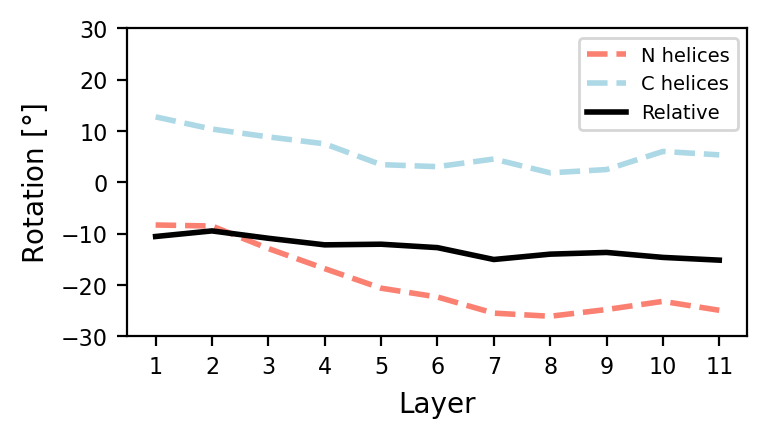

In [31]:
bundle_df, global_rot = measure('./example_pdb/frame_0.pdb', 283, 311, 13, phi = crangles['a'])

In [32]:
bundle_df

res_name  res_number chain_name  chain_ap    radius       crick  \
layer chain                                                                   
0     0          PRO         283          A     False       NaN         NaN   
      1          GLU         311          A     False       NaN         NaN   
      2          PRO         283          B     False       NaN         NaN   
      3          GLU         311          B     False       NaN         NaN   
1     0          ILE         284          A     False  7.214577   10.399187   
      1          ILE         312          A     False  7.976164   33.096028   
      2          ILE         284          B     False  7.318278   12.023372   
      3          ILE         312          B     False  7.961319   31.448253   
2     0          ILE         285          A     False  7.290847  114.478703   
      1          GLY         313          A     False  7.664774  130.593191   
      2          ILE         285          B     False  7.438359  113.260604   
      3          GLY         313          B     False  7.676088  134.910706   
3     0          GLU         286          A     False  7.342617 -148.977014   
      1          ILE         314          A     False  7.428244 -127.539881   
      2          GLU         286          B     False  7.459450 -146.346608   
      3          ILE         314          B     False  7.432087 -124.284256   
4     0          LEU         287          A     False  7.520272  -50.792044   
      1          LEU         315          A     False  7.159694  -27.000598   
      2          LEU         287          B     False  7.538699  -46.644923   
      3          LEU         315          B     False  7.172858  -21.805875   
5     0          SER         288          A     False  7.643546   49.805840   
      1          ALA         316          A     False  6.859992   75.978854   
      2          SER         288          B     False  7.659730   50.857481   
      3          ALA         316          B     False  6.789325   72.814040   
6     0          ASN         289          A     False  7.799145  151.005915   
      1          LYS         317          A     False  6.632493 -178.612557   
      2          ASN         289          B     False  7.832310  151.933474   
      3          LYS         317          B     False  6.567416  172.343280   
7     0          THR         290          A     False  7.936283 -107.512997   
      1          SER         318          A     False  6.235597  -75.099575   
      2          THR         290          B     False  8.028528 -110.117984   
      3          SER         318          B     False  6.217449  -82.486472   
8     0          ALA         291          A     False  8.061601   -5.802646   
      1          ILE         319          A     False  5.897123   22.813481   
      2          ALA         291          B     False  8.076062   -7.332926   
      3          ILE         319          B     False  5.986522   19.927173   
9     0          ASP         292          A     False  8.237910   98.460802   
      1          GLU         320          A     False  5.707322  125.356982   
      2          ASP         292          B     False  8.192246   96.741670   
      3          GLU         320          B     False  5.778822  124.381447   
10    0          LYS         293          A     False  8.280052 -156.682131   
      1          ARG         321          A     False  5.459283 -128.861708   
      2          LYS         293          B     False  8.325273 -159.219132   
      3          ARG         321          B     False  5.503626 -128.631258   
11    0          ILE         294          A     False  8.424200  -55.673364   
      1          LEU         322          A     False  5.410585  -26.086268   
      2          ILE         294          B     False  8.547735  -57.986147   
      3          LEU         322          B     False  5.473650  -27.025711   
12    0          ALA         295          A     False       Na

In [33]:
global_rot

-12.735230553251567